In [53]:
!pip install numpy pandas matplotlib seaborn wordcloud nltk scikit-learn imbalanced-learn

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from nltk.probability import FreqDist
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'vader_lexicon'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muzam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muzam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muzam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\muzam\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\muzam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
dataset = pd.read_csv('twitter_training.csv', header=None)

In [56]:
dataset.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [58]:
dataset.drop(columns= [0,1], inplace=True)

In [59]:
dataset.dropna(inplace=True)

In [60]:
dataset.columns= ["target", "text"]

In [61]:
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [62]:
dataset['text']=dataset['text'].str.lower()
dataset.head()

,target,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [63]:
print("Data label count")
print(dataset.groupby("target").count())

Data label count
             text
target           
Irrelevant  12875
Negative    22358
Neutral     18108
Positive    20655


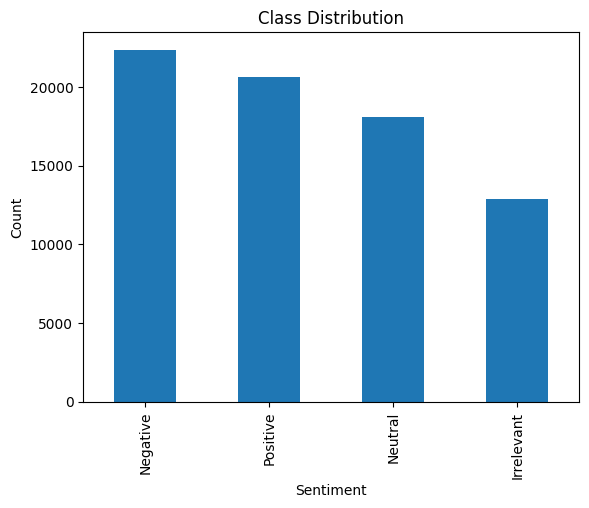

In [64]:
dataset['target'].value_counts().plot(kind='bar', 
                                      title='Class Distribution', 
                                      xlabel='Sentiment', ylabel='Count')
plt.show()

In [65]:
all_words = ' '.join(dataset['text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)
print("Most Common Words:", most_common_words)

Most Common Words: [('the', 44099), ('i', 28916), ('to', 28652), ('and', 26322), ('a', 23925), ('of', 19307), ('is', 17453), ('for', 15410), ('in', 15046), ('/', 14655)]


count    73996.000000
mean       108.783650
std         79.524212
min          1.000000
25%         47.000000
50%         91.000000
75%        153.000000
max        957.000000
Name: text_length, dtype: float64


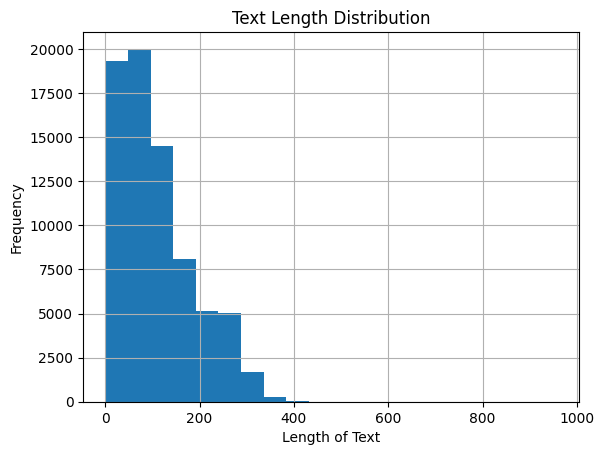

In [66]:
dataset['text_length'] = dataset['text'].apply(len)
print(dataset['text_length'].describe())
dataset['text_length'].hist(bins=20)
plt.title("Text Length Distribution")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()

In [67]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')

In [68]:
stopwords = nltk.corpus.stopwords.words('english')

In [69]:
stemmer = nltk.stem.PorterStemmer()

In [70]:
def preprocessing(text):
    tokenized = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens =  [word.lower() for word in tokenized if word.lower() not in stopwords]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    stemmed_text = ' '.join(stemmed_text)
    return stemmed_text

In [71]:
dataset['text'] = dataset['text'].apply(preprocessing)

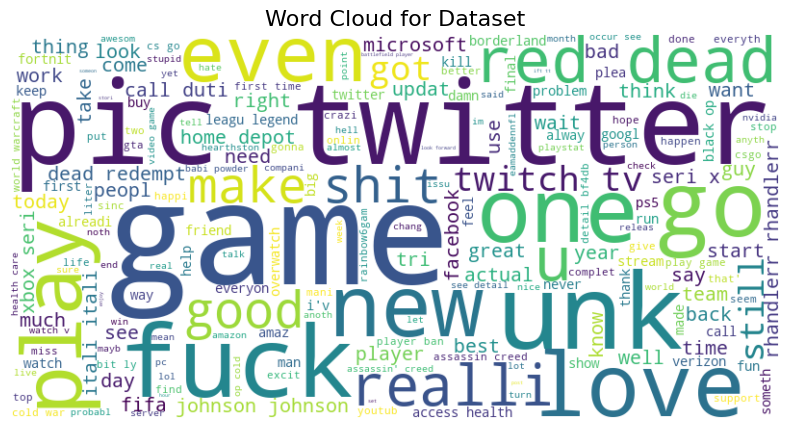

In [72]:
# Combine all text in the dataset into a single string
all_text = ' '.join(dataset['text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud for Dataset", fontsize=16)
plt.show()

In [73]:
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=STOPWORDS
).generate(all_text)

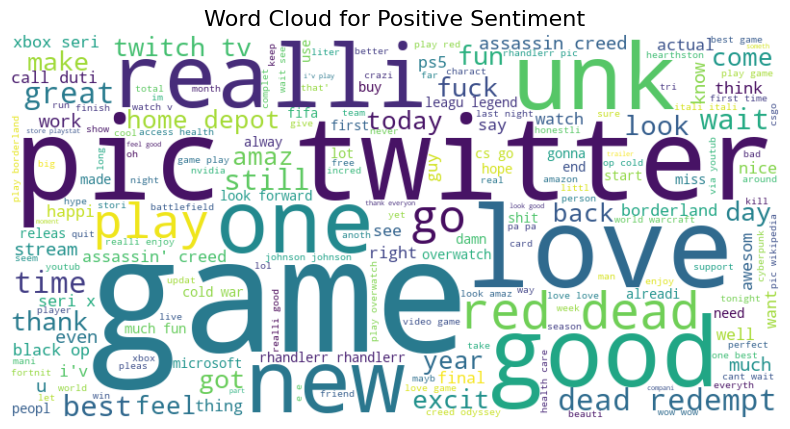

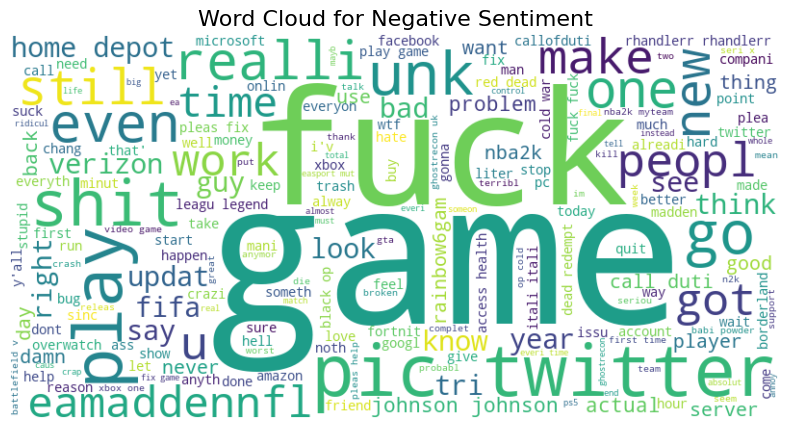

In [74]:
positive_text = ' '.join(dataset[dataset['target'] == 'Positive']['text'])
negative_text = ' '.join(dataset[dataset['target'] == 'Negative']['text'])

# Word cloud for positive sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment", fontsize=16)
plt.show()

# Word cloud for negative sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiment", fontsize=16)
plt.show()


In [75]:
X = dataset['text']
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [77]:
print("\n All data labels")
print(dataset.groupby('target').count())


 All data labels
             text  text_length
target                        
Irrelevant  12875        12875
Negative    22358        22358
Neutral     18108        18108
Positive    20655        20655


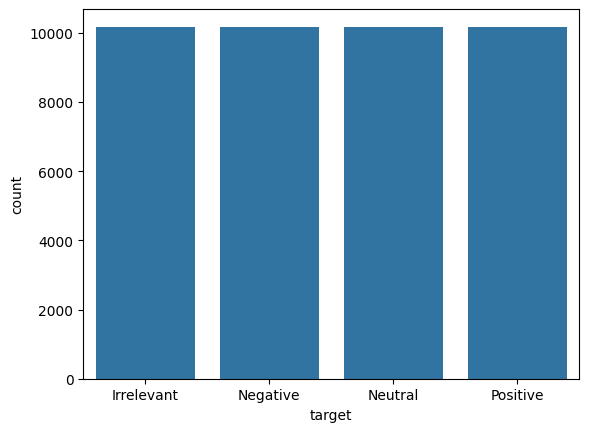

In [78]:
resampler = RandomUnderSampler(random_state=0)
X_train, y_train = resampler.fit_resample(X_train, y_train)
sns.countplot(x=y_train)
plt.show()

In [79]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [80]:
y_pred = model.predict(X_test)

In [81]:
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('--------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print (result)

accuracy:0.71


Confusion Matrix:
[[1946  308  104  338]
 [ 352 3386  251  391]
 [ 414  503 2168  520]
 [ 376  408  263 3072]] 


--------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.63      0.72      0.67      2696
    Negative       0.74      0.77      0.75      4380
     Neutral       0.78      0.60      0.68      3605
    Positive       0.71      0.75      0.73      4119

    accuracy                           0.71     14800
   macro avg       0.71      0.71      0.71     14800
weighted avg       0.72      0.71      0.71     14800



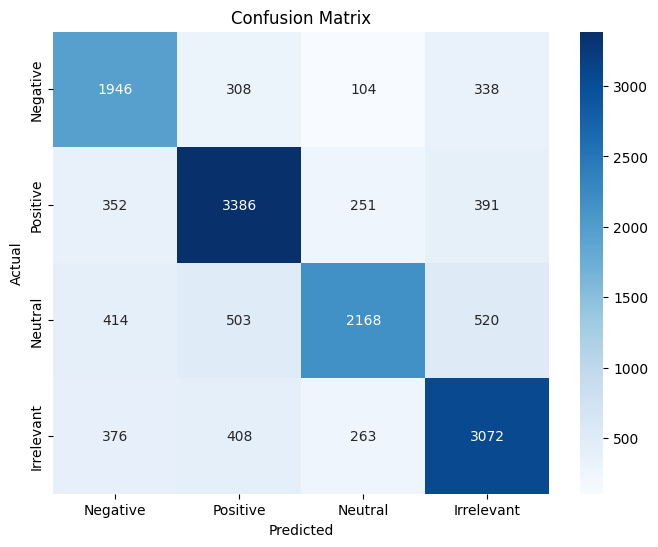

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive','Neutral','Irrelevant'], 
            yticklabels=['Negative', 'Positive','Neutral','Irrelevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
def analyze_sentiment(review_text):
    # Preprocess the review text
    processed_text = preprocessing(review_text)
    vectorized_text = cv.transform([processed_text])
    sentiment = model.predict(vectorized_text)[0]
    return f"Sentiment for your review: {sentiment}"

## Positive tests

In [84]:
analyze_sentiment('The service was excellent, very satisfied!')

'Sentiment for your review: Positive'

In [85]:
analyze_sentiment('I absolutely love this product!')

'Sentiment for your review: Positive'

## Negative tests

In [86]:
analyze_sentiment("This is the worst experience I have ever had")

'Sentiment for your review: Negative'

In [87]:
analyze_sentiment("The product broke after one use, awful!")

'Sentiment for your review: Negative'

## Neutral

In [88]:
analyze_sentiment("It’s okay, nothing special to be honest.")

'Sentiment for your review: Irrelevant'

In [89]:
analyze_sentiment("Meh, could’ve been better, but not bad.")

'Sentiment for your review: Negative'

## Irrelevant

In [90]:
analyze_sentiment("What’s the weather like today?")

'Sentiment for your review: Positive'

In [91]:
analyze_sentiment("I’ll be visiting my friend later.")

'Sentiment for your review: Irrelevant'

In [92]:
pos_freq = FreqDist(positive_text)
pos_freq.tabulate(10)

            e      a      o      t      i      r      n      l      s 
213449 106789  88295  79328  77954  67687  65750  57610  56334  49644 


In [93]:
neg_freq = FreqDist(negative_text)
neg_freq.tabulate(10)

            e      a      t      o      i      r      n      l      s 
260040 127839 108506  93149  92755  82986  81298  74548  68171  64774 


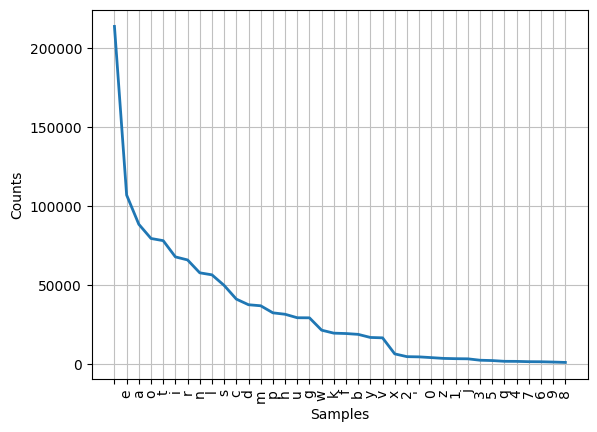

In [94]:
pos_freq.plot(50)
plt.show()

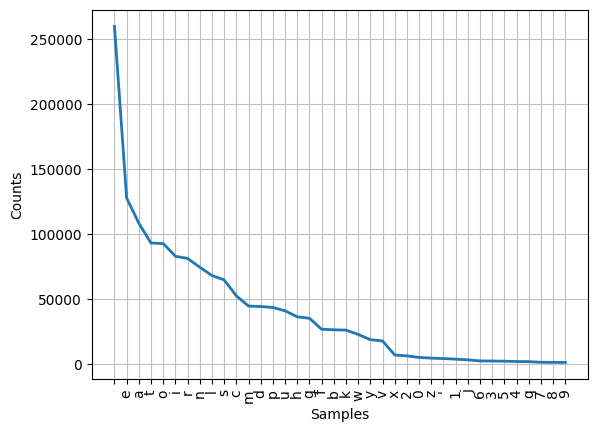

In [95]:
neg_freq.plot(50)
plt.show()